In [ ]:
!pip install -q spectral

     |████████████████████████████████| 212 kB 4.1 MB/s 


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import tifffile as tif
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, medfilt

In [ ]:
# Leitura da imagem
img = tif.imread('ndviMODIS.tif')

In [ ]:
# Savitsky-Golay
sav = savgol_filter(img, 13,3, axis=2)

In [ ]:
# Visualizando espectro temporal
plt.plot(img[350,500,:], color = 'green', linewidth=2, alpha=0.5)
plt.plot(sav[350,500,:], color = 'red', linewidth=2)
plt.grid()
plt.legend(labels=['Original', 'Filtrada'], fontsize=20)
plt.show()

In [ ]:
# Declarando arrays que receberão as estatísticas
mean = np.empty_like(sav[:,:,0])
median = np.empty_like(sav[:,:,0])
var = np.empty_like(sav[:,:,0])
std = np.empty_like(sav[:,:,0])

In [ ]:
# Calculando estatísticas no tempo
for i in range(sav.shape[0]):
  for j in range(sav.shape[1]):
    mean[i,j] = np.mean(sav[i,j,:])
    median[i,j] = np.median(sav[i,j,:])
    var[i,j] = np.var(sav[i,j,:])
    std[i,j] = np.std(sav[i,j,:])

In [ ]:
# Empilhando resultados
result = np.dstack([mean,median,var,std])
nom = ['Média', 'Mediana', 'Variância', 'Desvio-Padrão']

In [ ]:
# Importando função para expansão do histograma
from astropy.visualization import SqrtStretch
stretch = SqrtStretch()

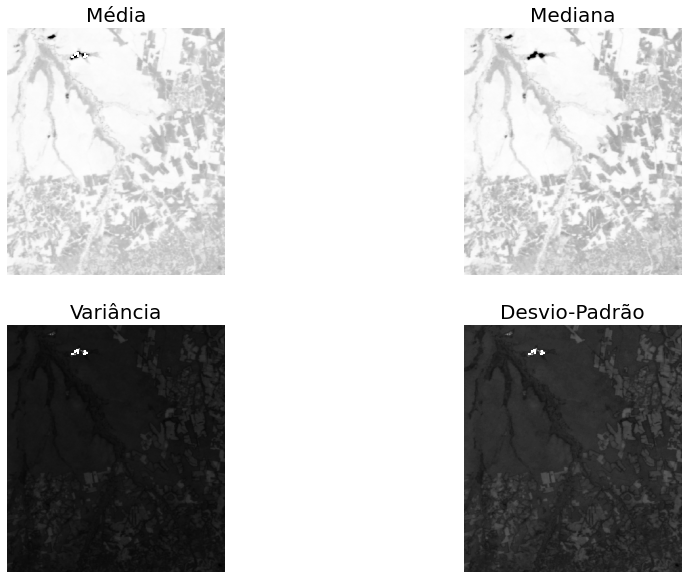

In [ ]:
# Visualizando resultados
fig,axes = plt.subplots(2,2,sharex='all', sharey='all') 
axes = axes.ravel() 
for i in range(result.shape[2]): 
  axes[i].imshow(stretch(result[:,:,i]),cmap='gray') 
  axes[i].set_title(nom[i],fontsize=20) 
  axes[i].axis('off')